# DBSCAN

Il DBSCAN (*Density-based spatial clustering of applications with noise*) è un algoritmo di clustering che offre alcuni vantaggi rispetto al K-means e al Clustering Gerarchico:
1. Non serve definire il numero di cluster
2. E' molto resistente agli outliers
3. Crea clusters non solo di forma sferica
<br>

Per utilizzare il DBSCAN bisogna definire il valore di due nuovi parametri:

1. **Eps**: la distanza massima tra due osservazioni appartenenti ad uno stesso cluster
2. **minPts**: il numero minimo di osservazioni richieste per formare un cluster

In questo notebook vedremo un esempio di clustering in cui il DBSCAN perfoma notevolmente meglio di K-means e Clustering Gerarchico Agglomerativo.
<br><br>
Importiamo le librerie necessarie.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

plt.rcParams["figure.figsize"] = (14, 10)
sns.set()

Utilizziamo la funzione <span style="font-family: Monaco">make_moons</span> di scikit-learn per creare un dataset rappresentato da due semicerchi.

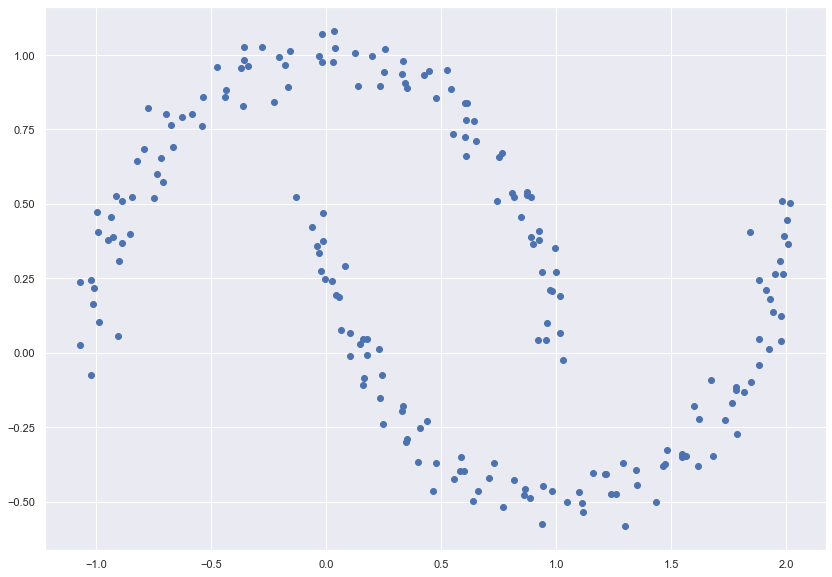

In [2]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.show()

Questo tipo di dataset è impossibile da dividere in clusters per K-means e Clustering Gerarchico, perché questi algoritmi riescono a creare clusters unicamente di forma sferica, vediamolo.

## K-means

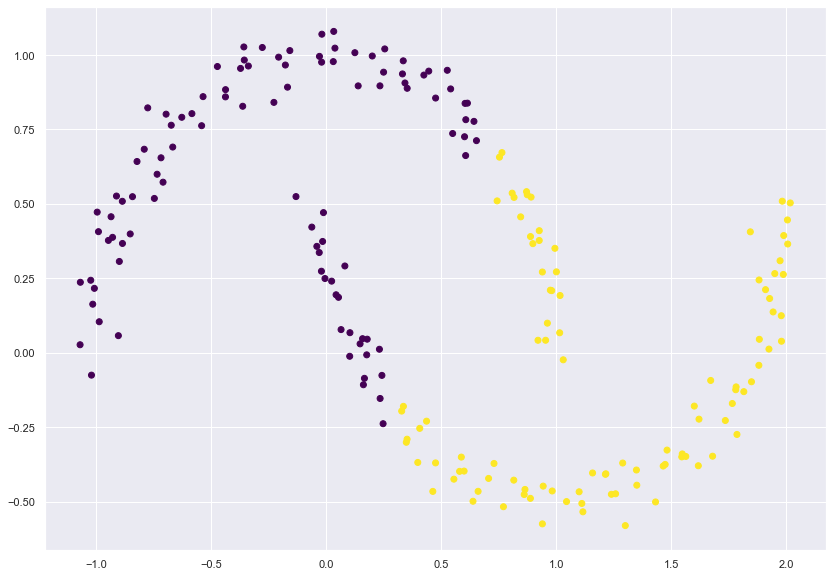

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X)
y_km = km.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_km,cmap='viridis')
plt.show()

## Clustering Gerarchico Agglomerativo

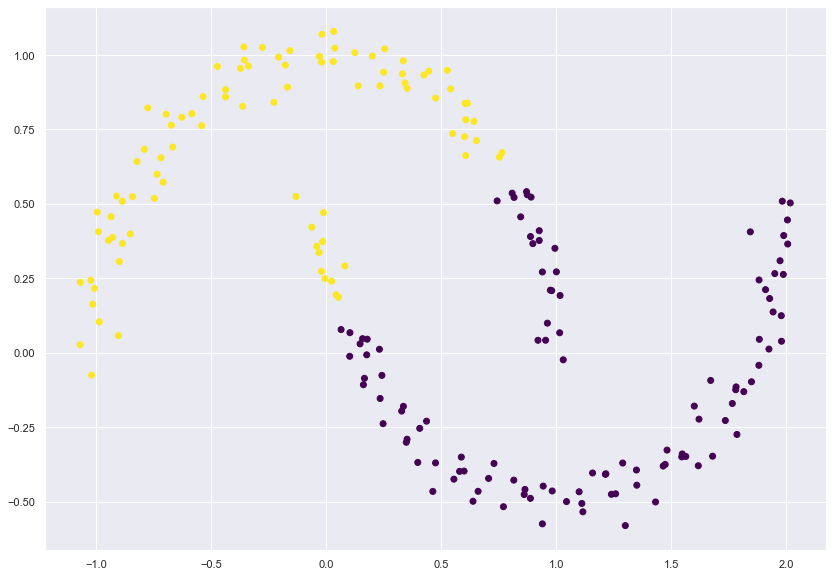

In [4]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, linkage="complete")
y_ac = ac.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_ac,cmap='viridis')
plt.show()

## DBSCAN
Adesso proviamo con il DBSCAN, come già precisato qui non serve specificare il numero di clusters, ma dobbiamo definire i valori di **eps** e **minPts**.

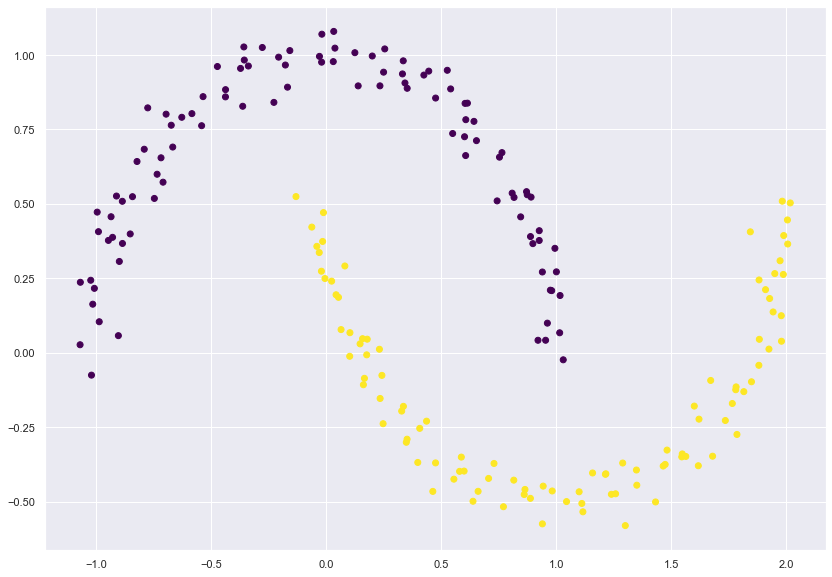

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan,cmap='viridis')
#core_pts = dbscan.components_
#plt.scatter(x=core_pts[:, 0], y=core_pts[:, 1], c='red', s=200, alpha=0.5);
plt.show()


DBSCAN è riuscito a suddividere il dataset in due clusters in maniera perfetta.

## Limiti del DBSCAN

Il principale problema del DBSCAN è che bisogna ottimizzare i valori di **eps** e **minPts** e questo è particolarmente difficile specialmente in casi in cui la densità dei clusters è notevolmente diversa, cioè quando la differenza del numero di osservazioni per cluster è elevata.